# =============================================================================
# PREDICTING PRICE OF PRE-OWNED CARS 
# =============================================================================

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# =============================================================================
# Setting dimensions for plot 
# =============================================================================

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# =============================================================================
# Reading CSV file
# =============================================================================

In [3]:
cars_data=pd.read_csv('cars_sampled.csv' )

# =============================================================================
# Creating copy
# =============================================================================

In [4]:
cars=cars_data.copy()

# =============================================================================
# Structure of the dataset
# =============================================================================

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

# =============================================================================
# Summarizing data
# =============================================================================

In [7]:
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
# To display maximum set of columns
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


# =============================================================================
# Dropping unwanted columns
# =============================================================================

In [9]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

# =============================================================================
# Removing duplicate records
# =============================================================================

In [10]:
cars.drop_duplicates(keep='first',inplace=True)

#470 duplicate records

# =============================================================================
# Data cleaning
# =============================================================================

In [11]:
# No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

<Axes: xlabel='yearOfRegistration', ylabel='price'>

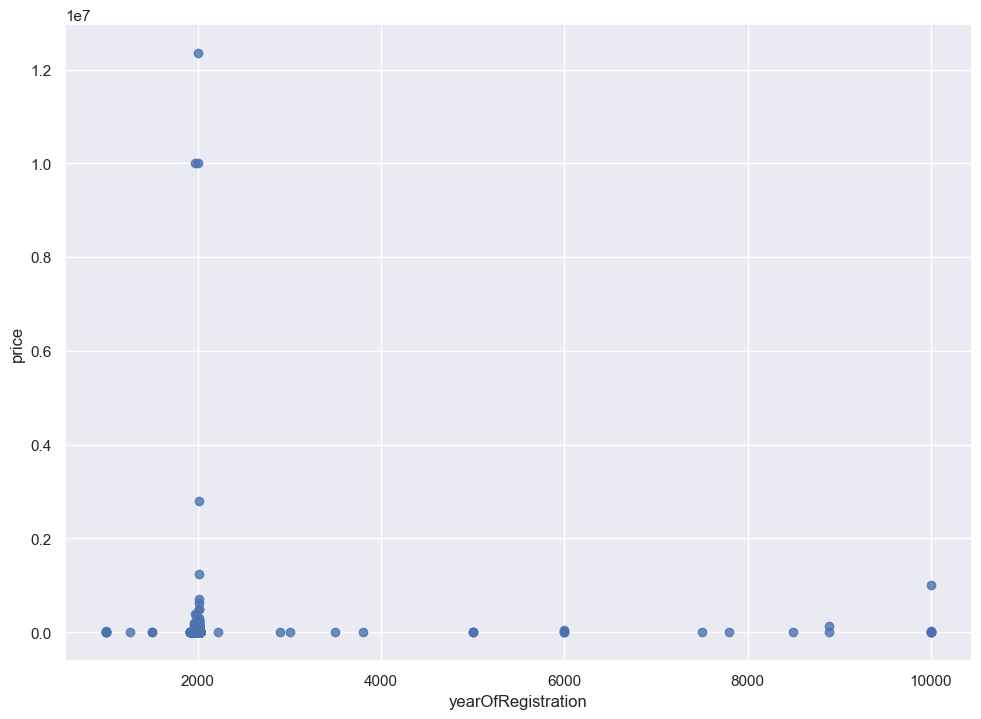

In [12]:
# Variable yearOfRegistration
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Working range- 1950 and 2018

0

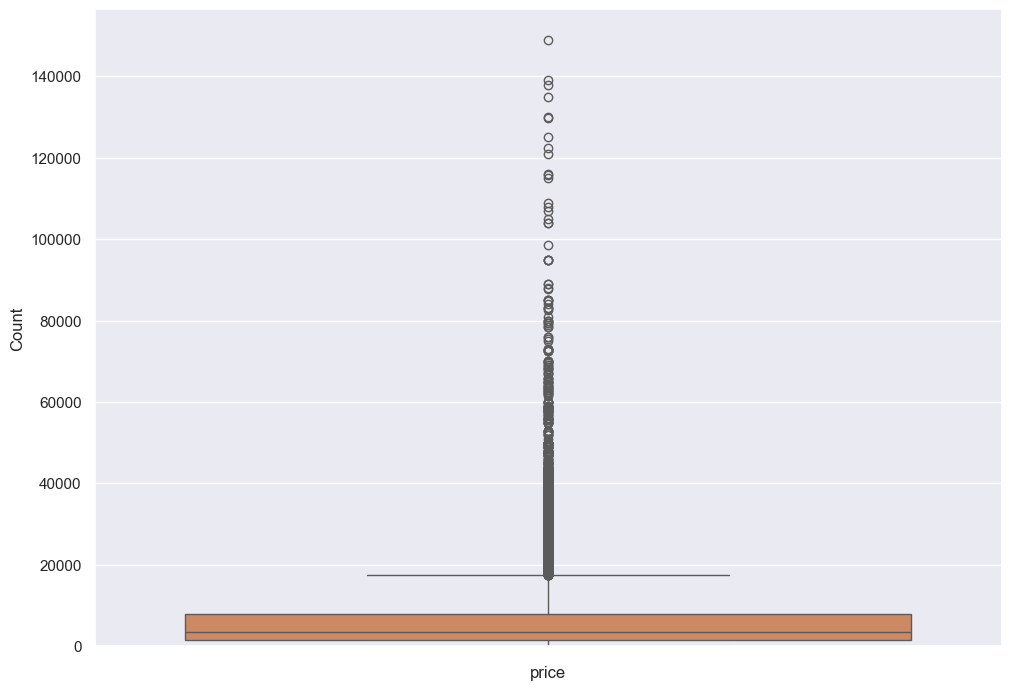

In [45]:
# Variable price
price_count=cars['price'].value_counts().sort_index()
sns.histplot(cars['price'])
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price'] > 150000)
sum(cars['price'] < 100)
# Working range- 100 and 150000

0

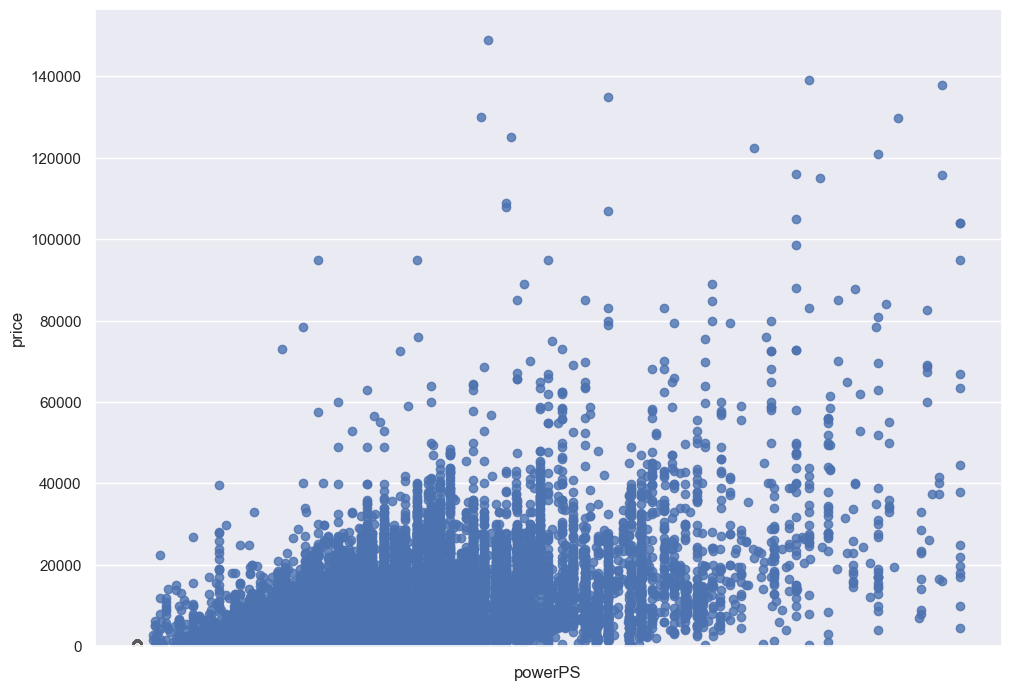

In [44]:
# Variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()
sns.histplot(cars['powerPS'])
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)
sum(cars['powerPS'] > 500)
sum(cars['powerPS'] < 10)
# Working range- 10 and 500

# =============================================================================
# Working range of data
# =============================================================================

In [15]:
# Working range of data

cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
# ~6700 records are dropped

In [16]:
# Further to simplify- variable reduction
# Combining yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12

In [17]:
# Creating new varible Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [18]:
# Dropping yearOfRegistration and monthOfRegistration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

## Visualizing parameters 

<Axes: xlabel='Age', ylabel='Count'>

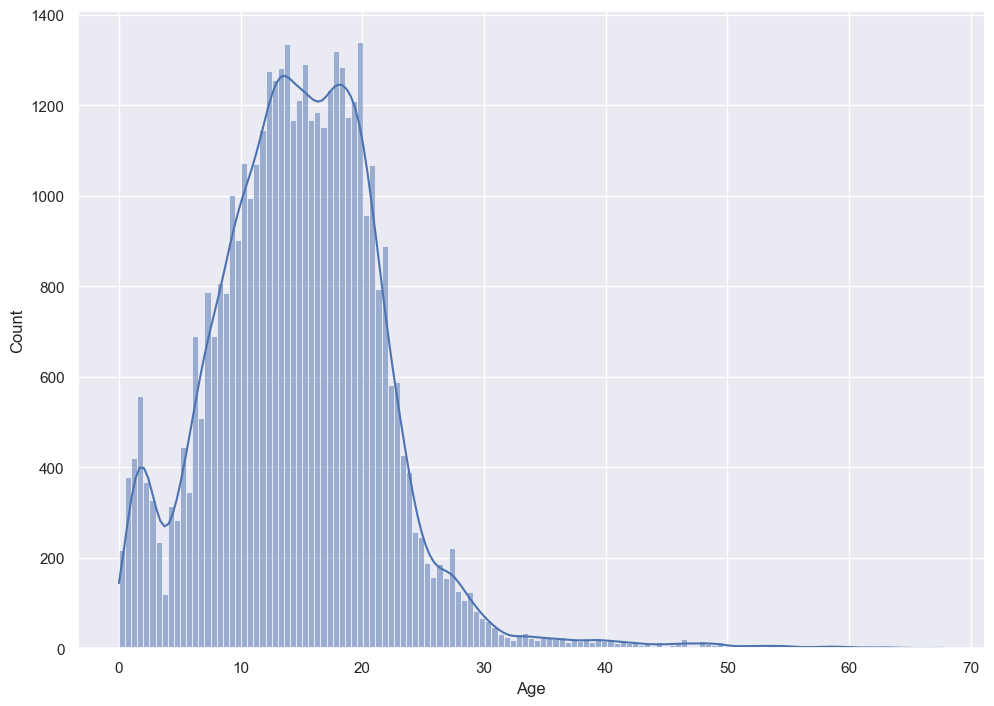

In [47]:
# Age
sns.histplot(cars['Age'], kde=True)  # kde=True adds a smooth density curve

<Axes: ylabel='Age'>

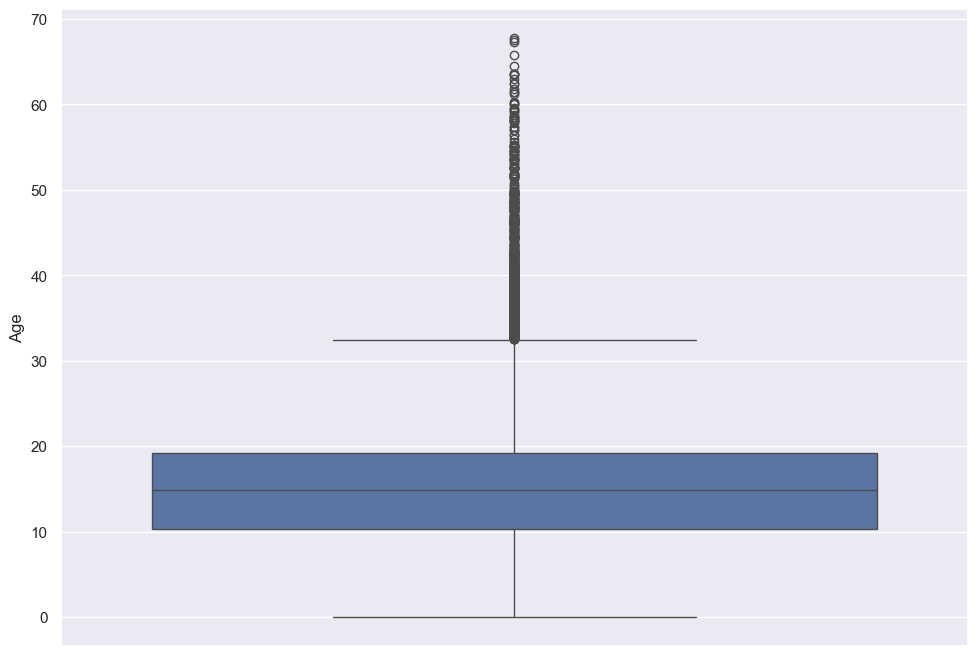

In [48]:
sns.boxplot(y=cars['Age'])

<Axes: xlabel='price', ylabel='Count'>

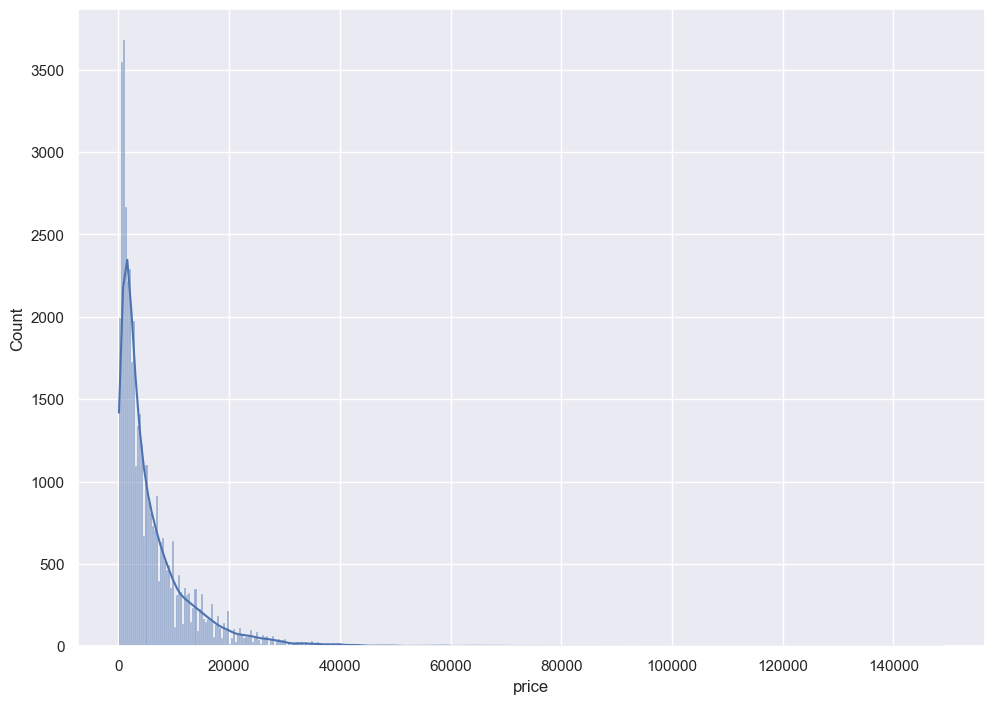

In [51]:
#Price
sns.histplot(cars['price'], kde=True)  # kde=True adds a smooth density curve

<Axes: ylabel='price'>

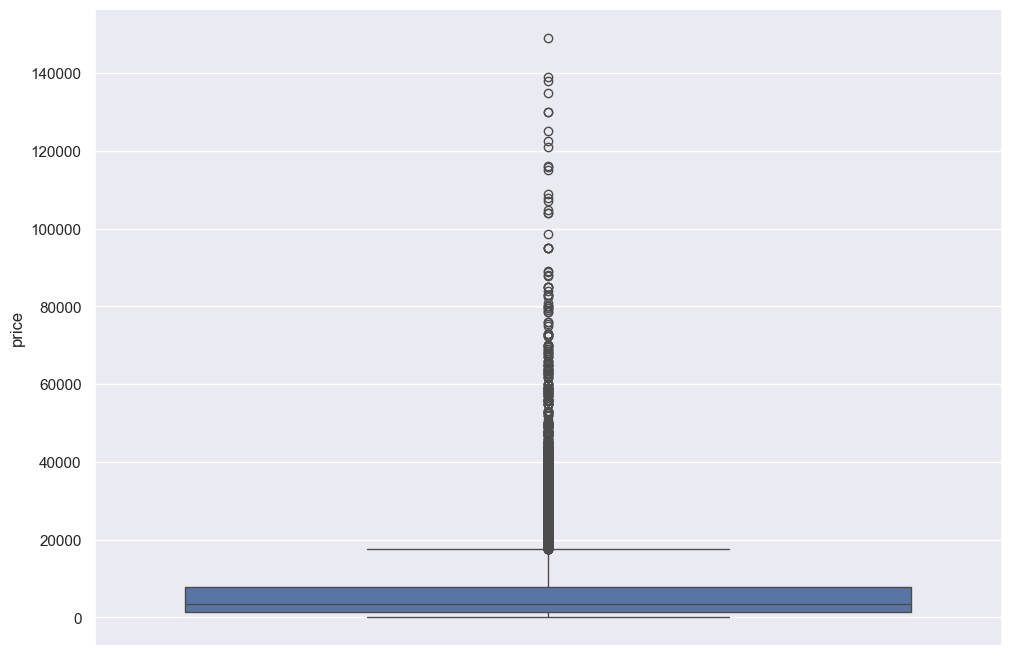

In [50]:
sns.boxplot(y=cars['price'])

<Axes: xlabel='powerPS', ylabel='Count'>

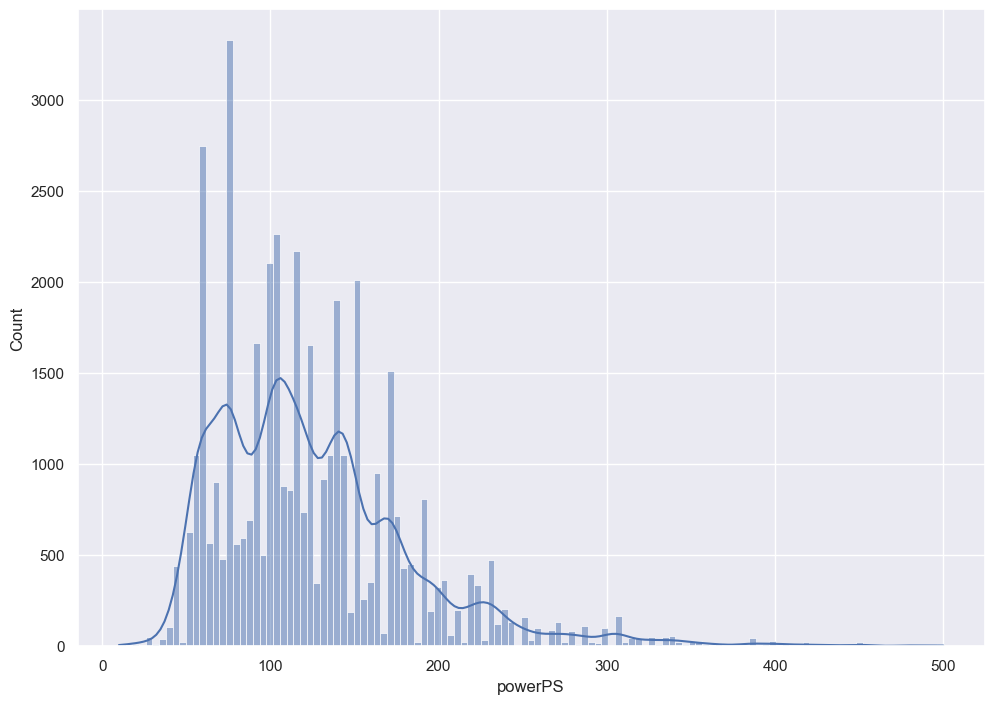

In [52]:
# powerPS
sns.histplot(cars['powerPS'], kde=True)  # kde=True adds a smooth density curve

<Axes: ylabel='price'>

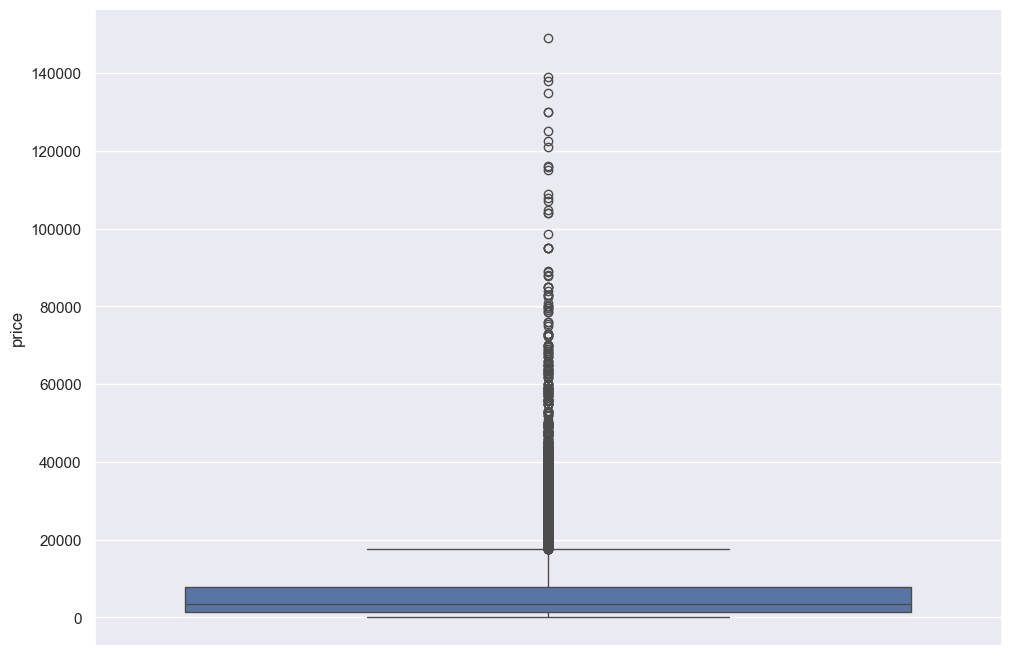

In [53]:
sns.boxplot(y=cars['price'])

<Axes: xlabel='Age', ylabel='price'>

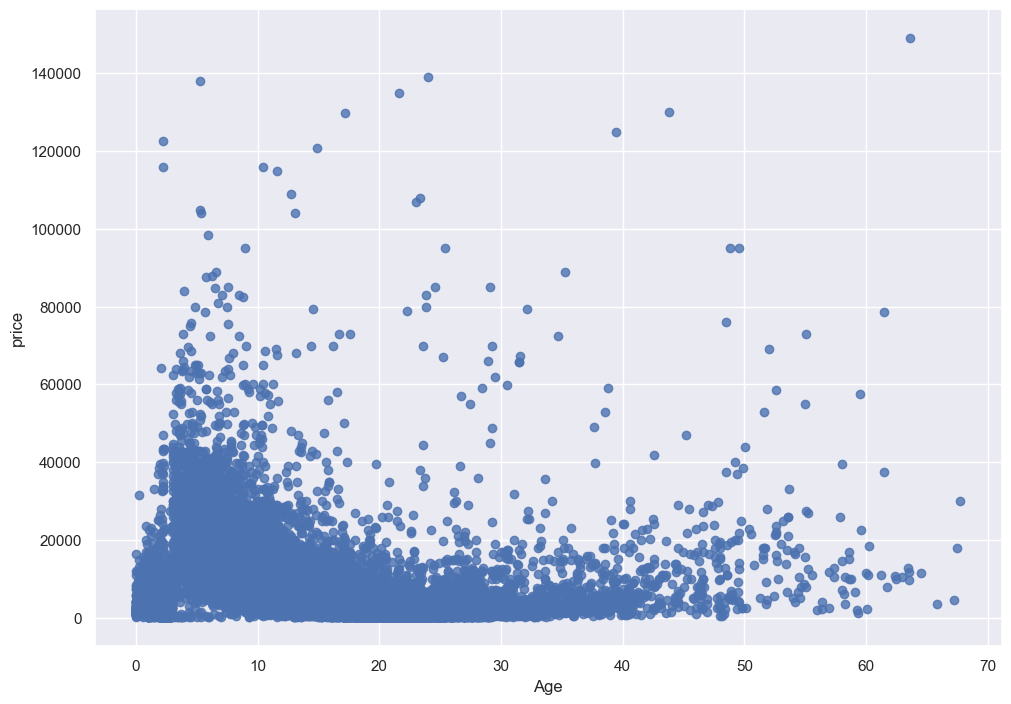

In [31]:
# Visualizing parameters after narrowing working range
# Age vs price
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Cars priced higher are newer
# With increase in age, price decreases
# However some cars are priced higher with increase in age

<Axes: xlabel='powerPS', ylabel='price'>

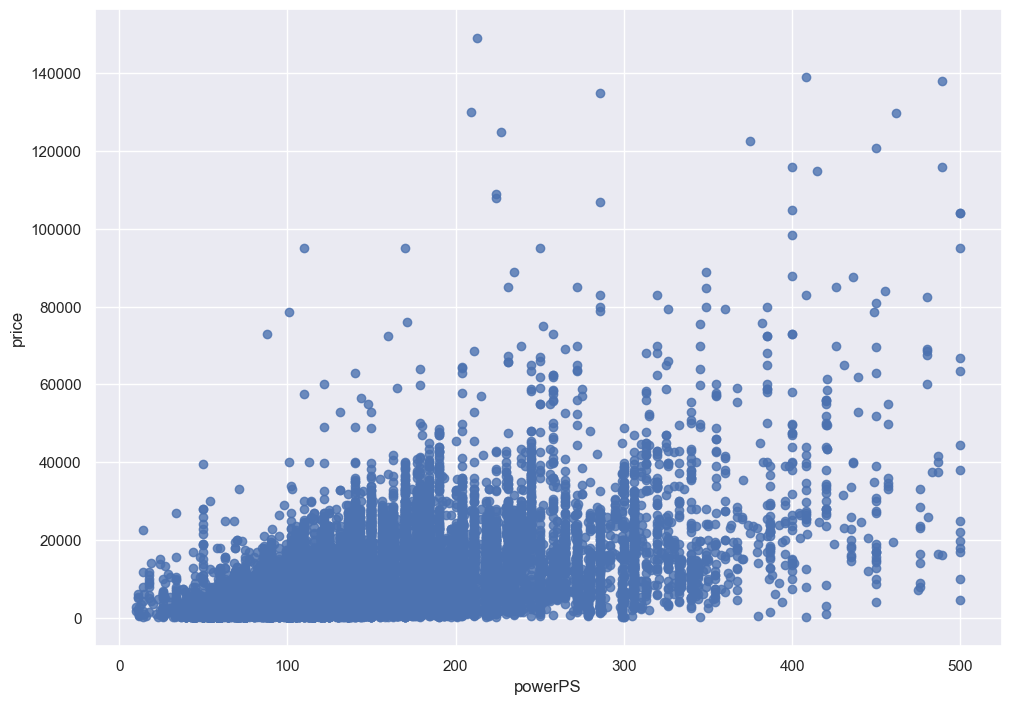

In [32]:
# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

<Axes: xlabel='seller', ylabel='count'>

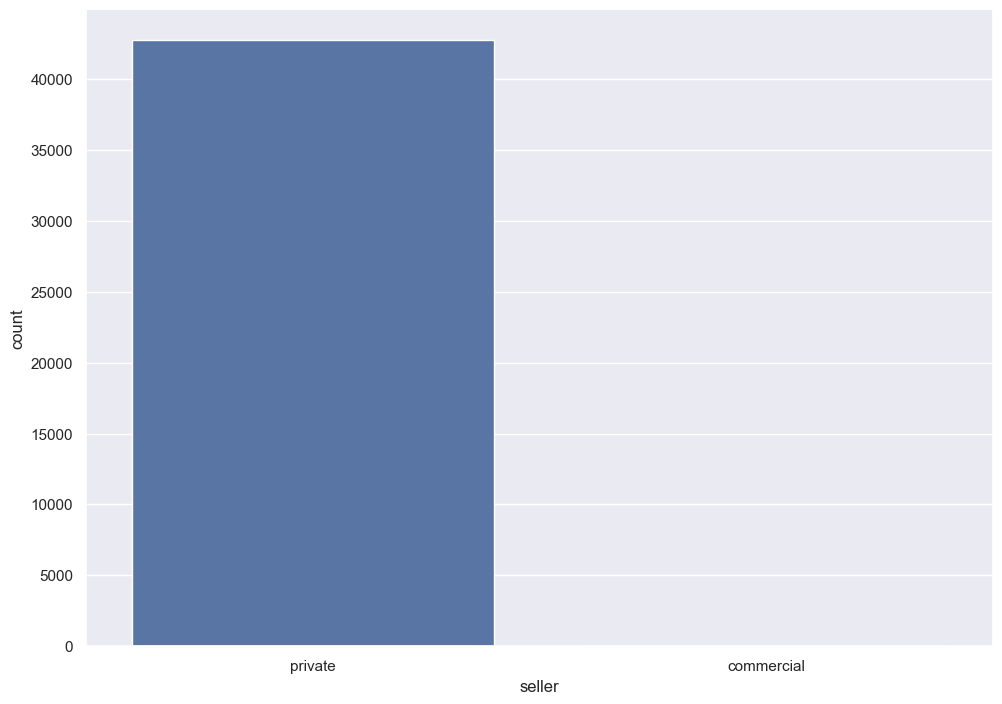

In [33]:
# Variable seller
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x= 'seller',data=cars)
# Fewer cars have 'commercial'=> Insignificant

<Axes: xlabel='offerType', ylabel='count'>

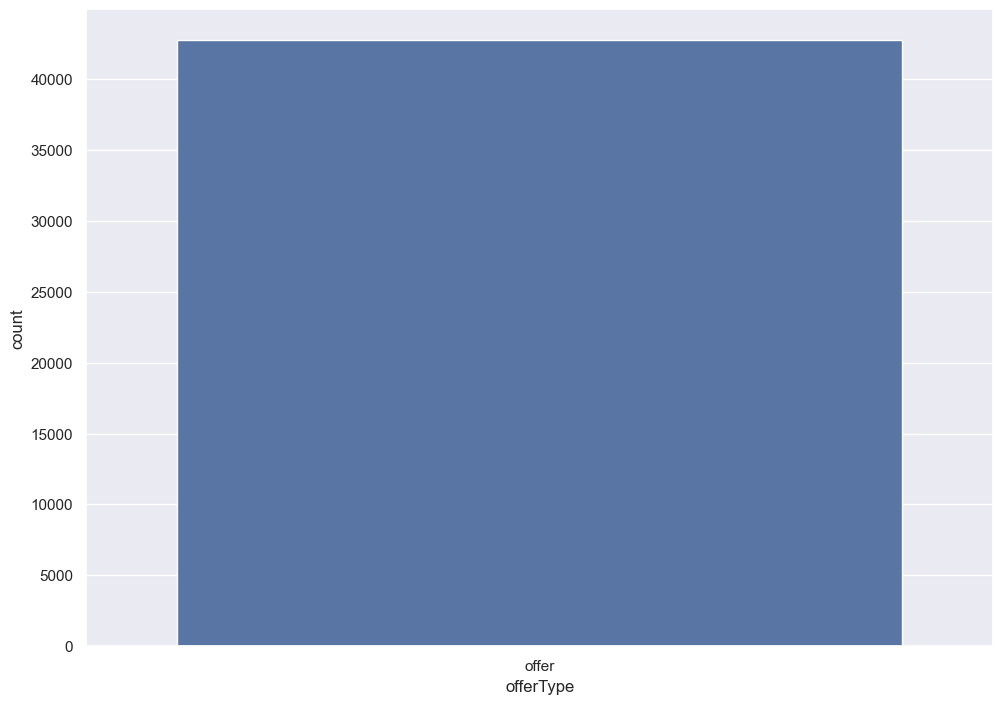

In [34]:
# Variable offerType
cars['offerType'].value_counts()
sns.countplot(x= 'offerType',data=cars)
# All cars have 'offer'=> Insignificant

<Axes: xlabel='abtest', ylabel='count'>

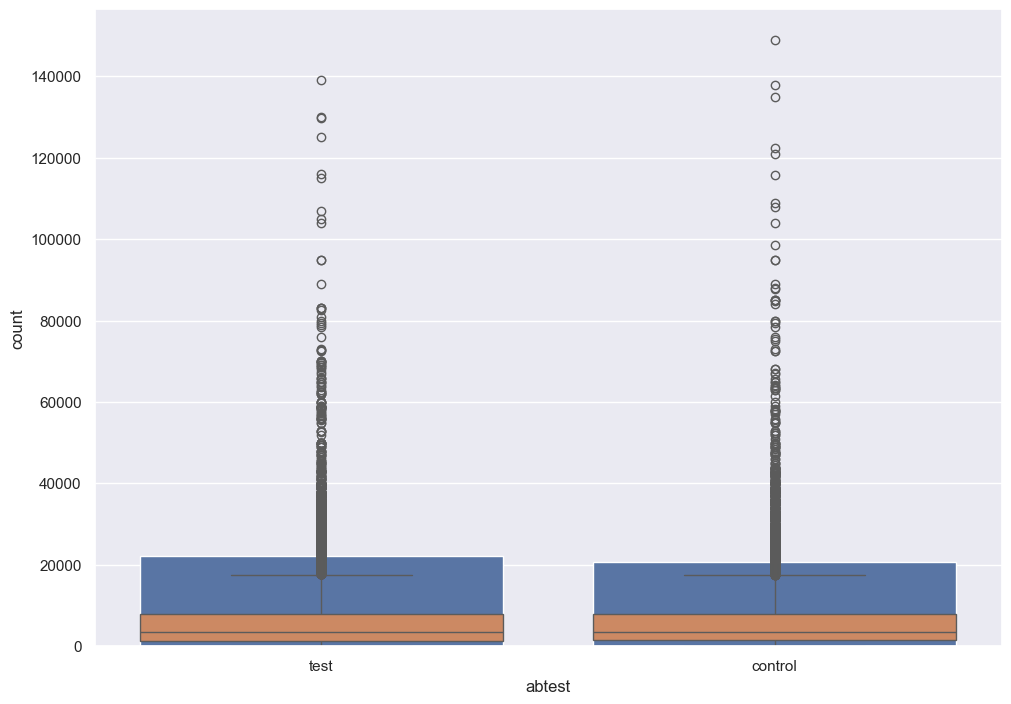

In [35]:
# Variable abtest
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x= 'abtest',data=cars)
# Equally distributed
sns.boxplot(x= 'abtest',y='price',data=cars)
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant

<Axes: xlabel='vehicleType', ylabel='count'>

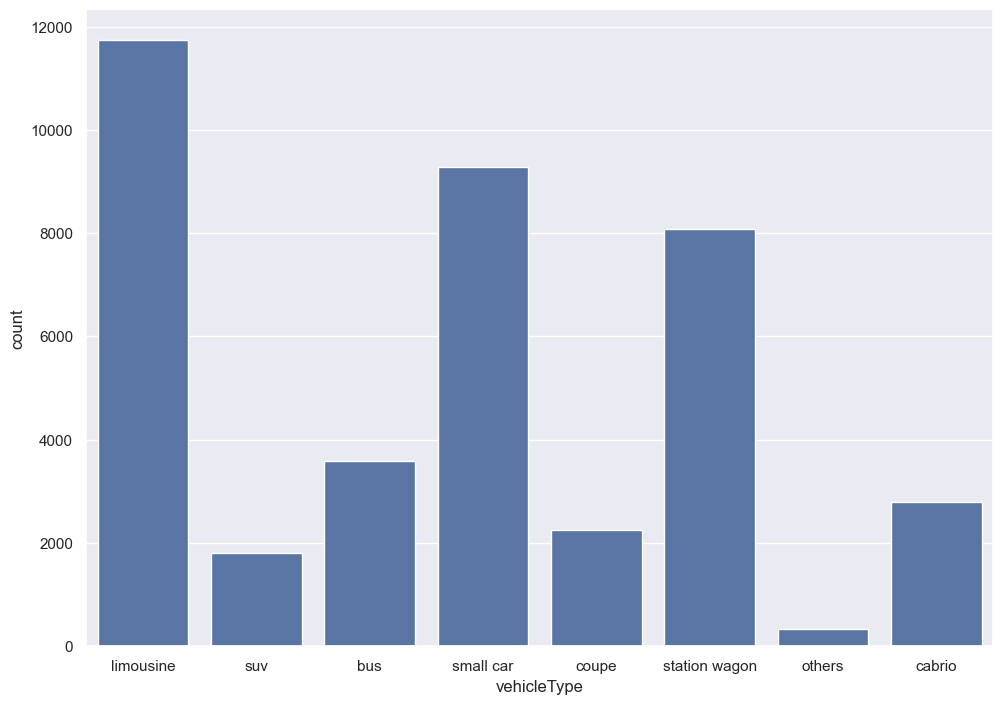

In [54]:
# Variable vehicleType
cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x= 'vehicleType',data=cars)


<Axes: xlabel='vehicleType', ylabel='price'>

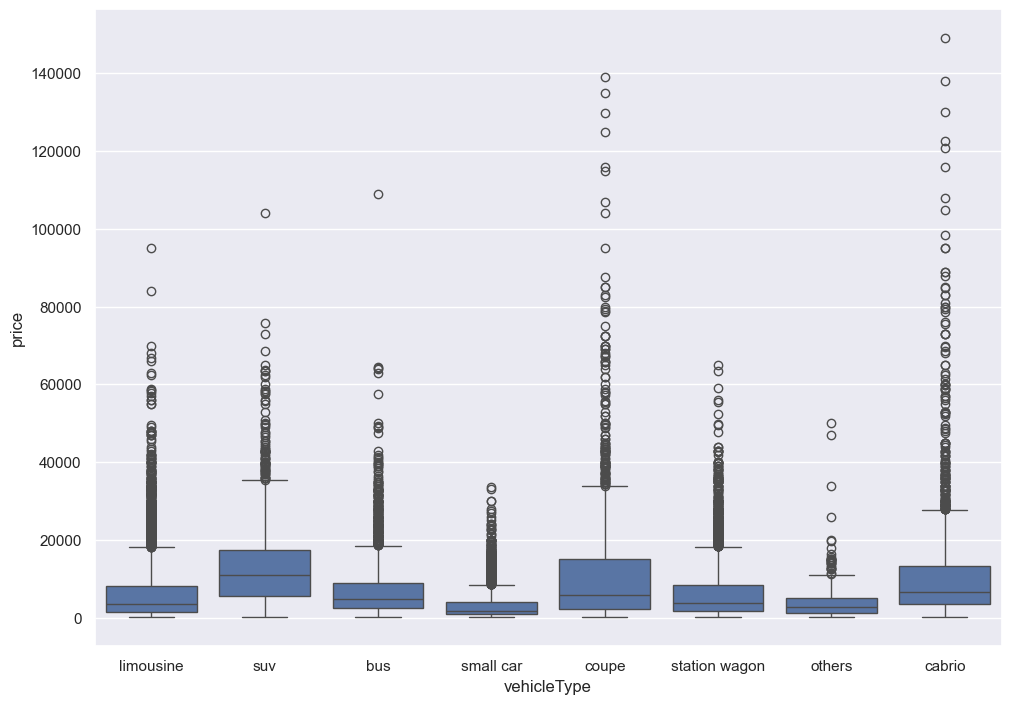

In [55]:
# 8 types- limousine, small cars and station wagons max freq
# vehicleType affects price 
sns.boxplot(x= 'vehicleType',y='price',data=cars)

<Axes: xlabel='gearbox', ylabel='count'>

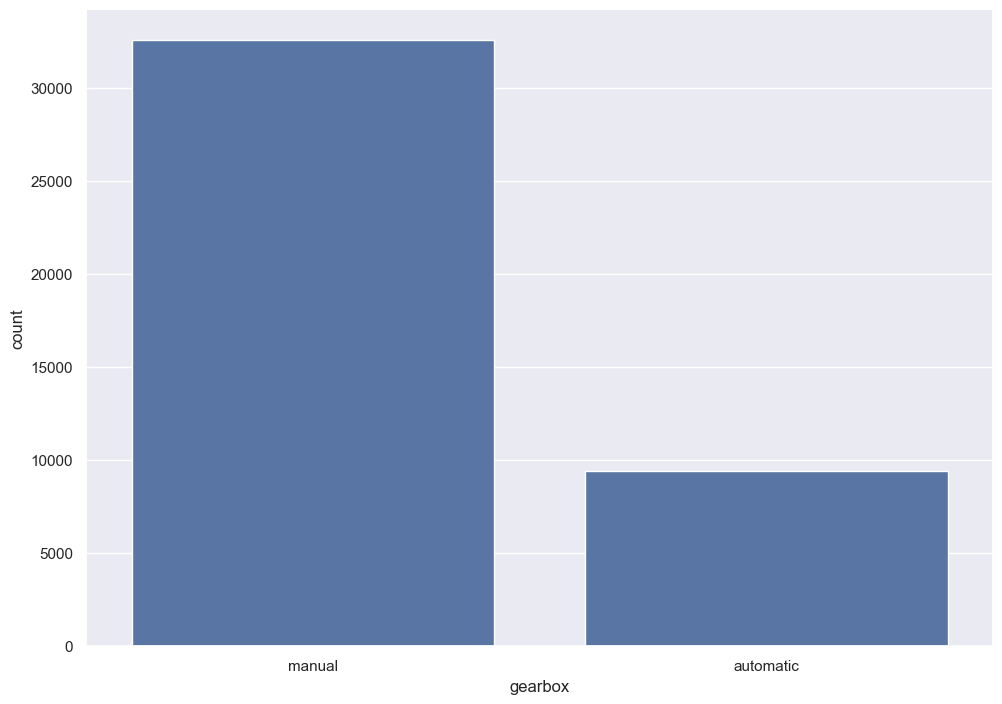

In [56]:
# Variable gearbox
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x= 'gearbox',data=cars)

<Axes: xlabel='gearbox', ylabel='price'>

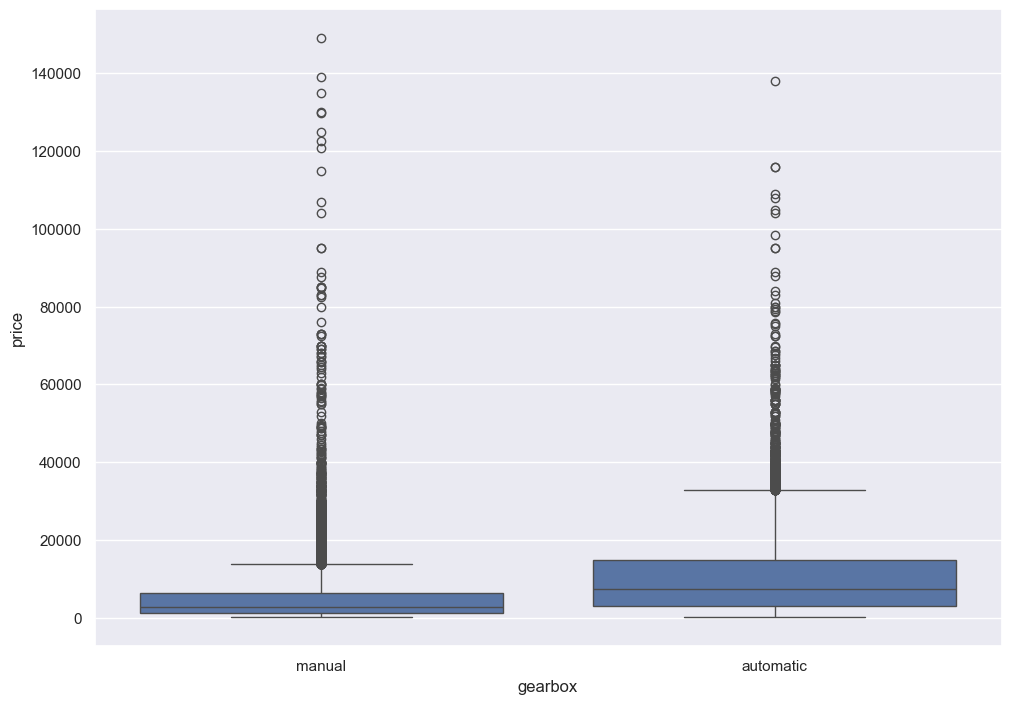

In [58]:
sns.boxplot(x= 'gearbox',y='price',data=cars)
# gearbox affects price 

<Axes: xlabel='model', ylabel='count'>

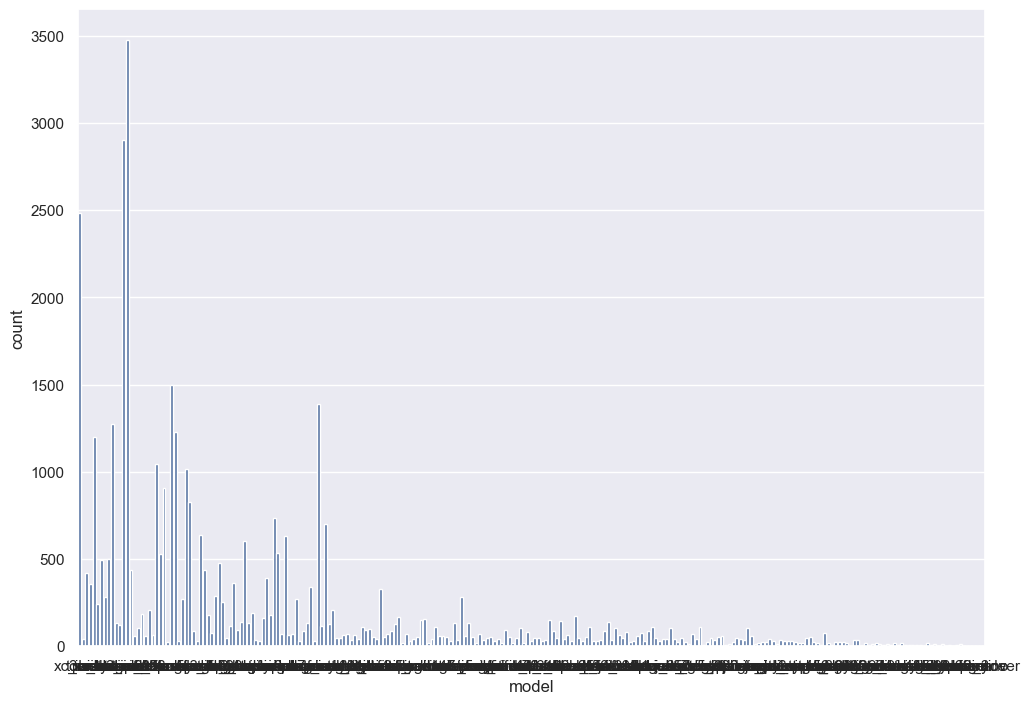

In [59]:
# Variable model
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.countplot(x= 'model',data=cars)
# Cars are distributed over many models
# Considered in modelling

<Axes: xlabel='model', ylabel='price'>

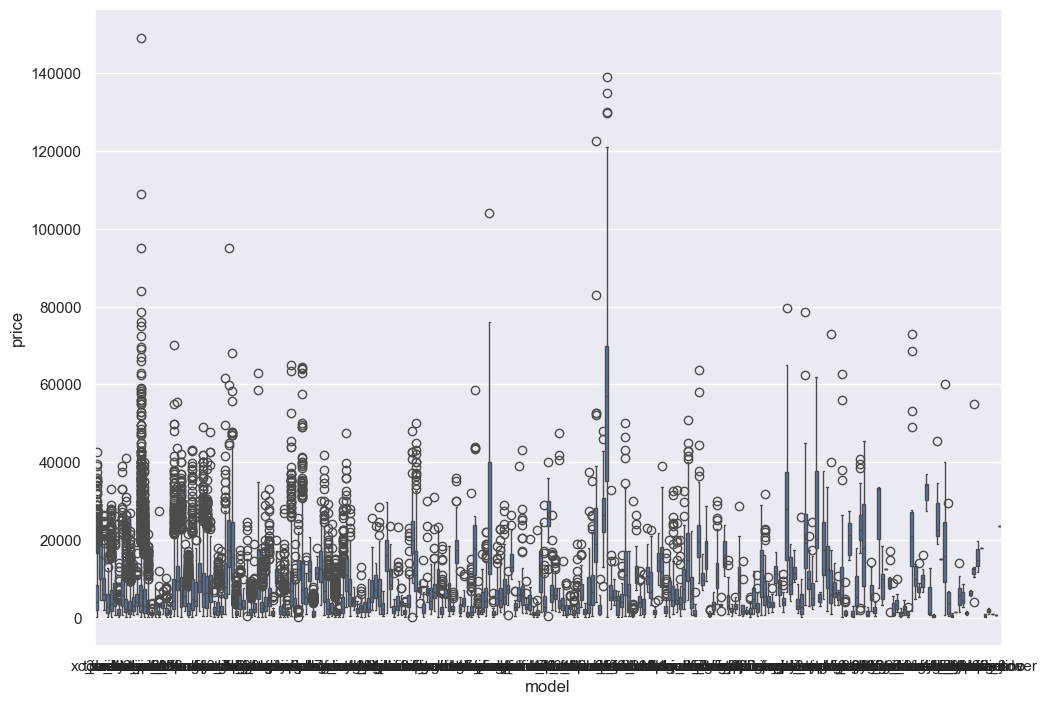

In [60]:
sns.boxplot(x= 'model',y='price',data=cars)

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

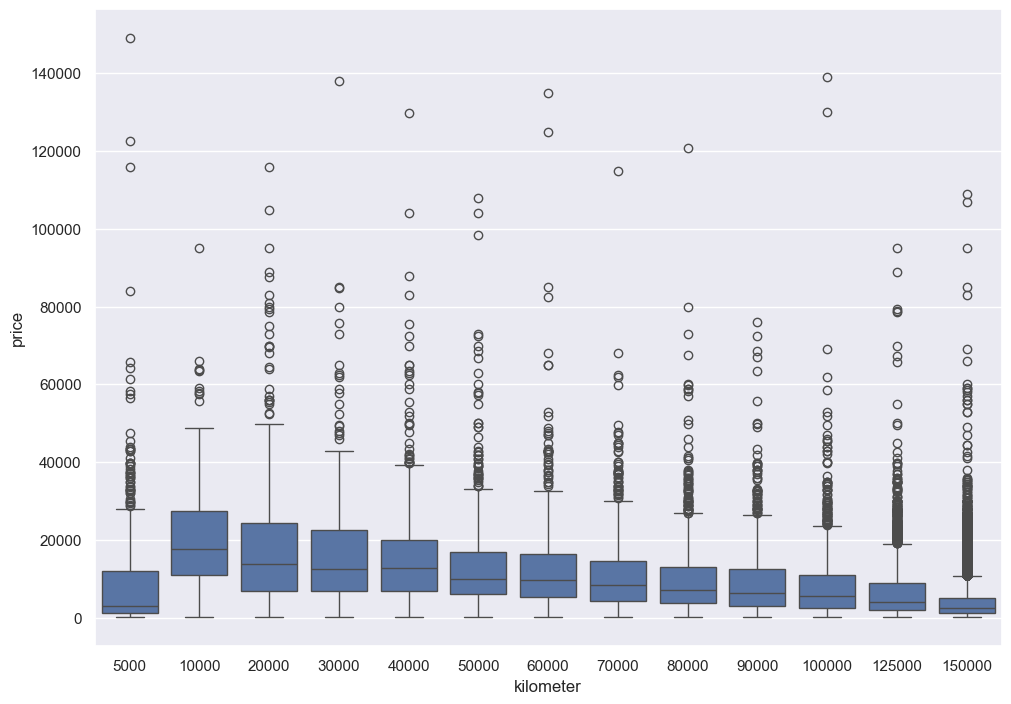

In [62]:
# Variable kilometer
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.boxplot(x= 'kilometer',y='price',data=cars)
cars['kilometer'].describe()
# Considered in modelling

<Axes: xlabel='kilometer', ylabel='Count'>

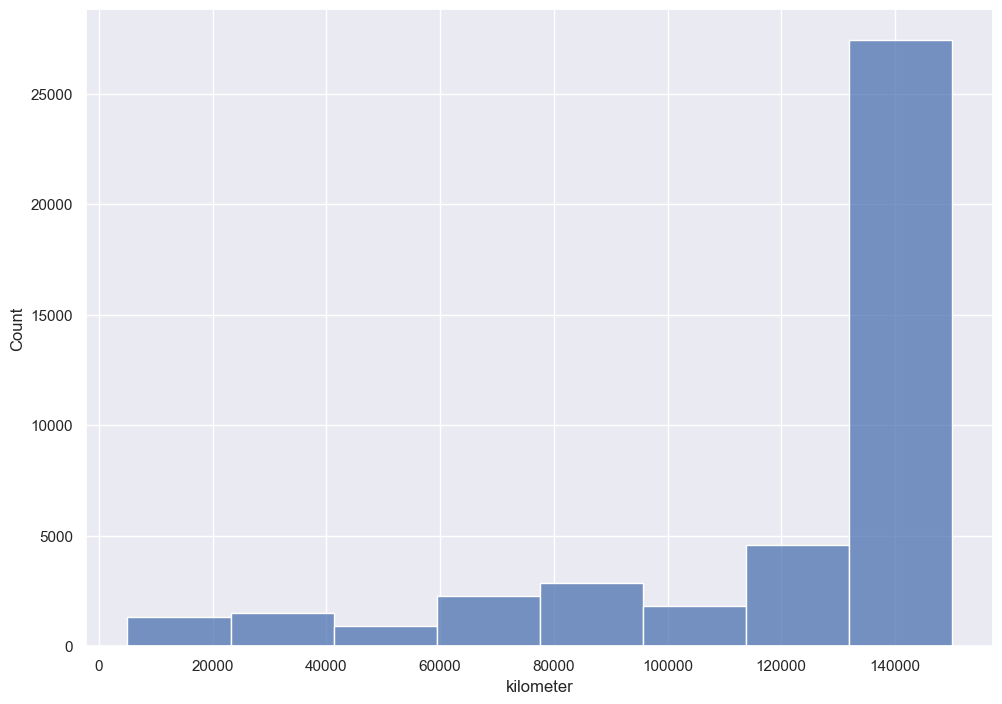

In [63]:
sns.histplot(cars['kilometer'],bins=8 ,kde=False)

<Axes: xlabel='kilometer', ylabel='price'>

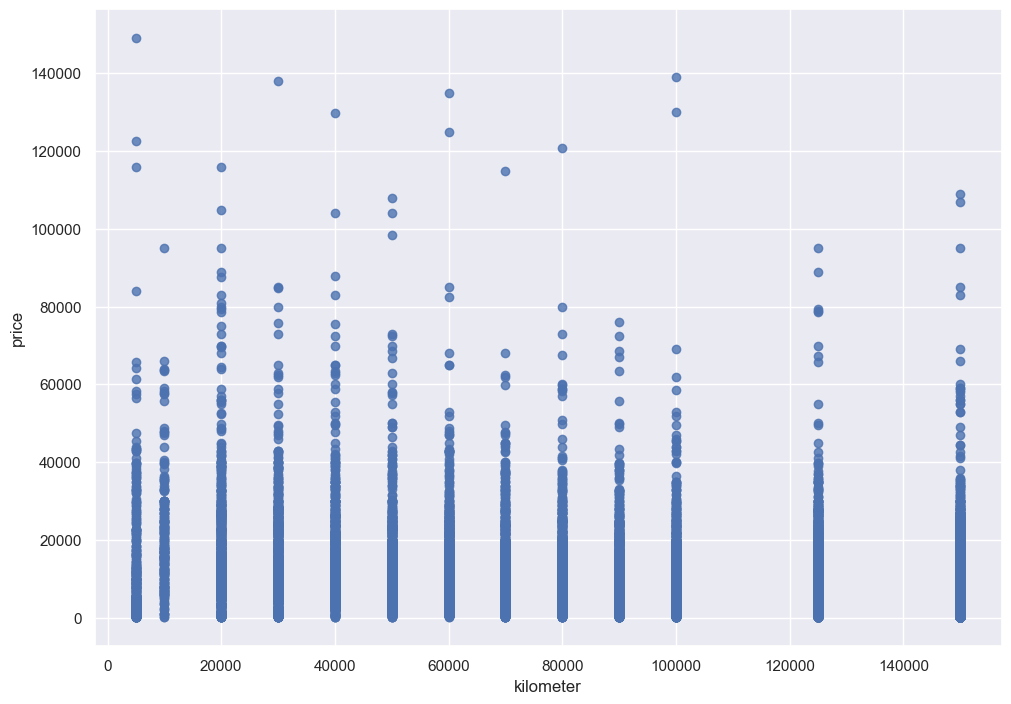

In [64]:
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)

In [66]:
# Variable fuelType
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
# fuelType affects price

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<Axes: xlabel='fuelType', ylabel='count'>

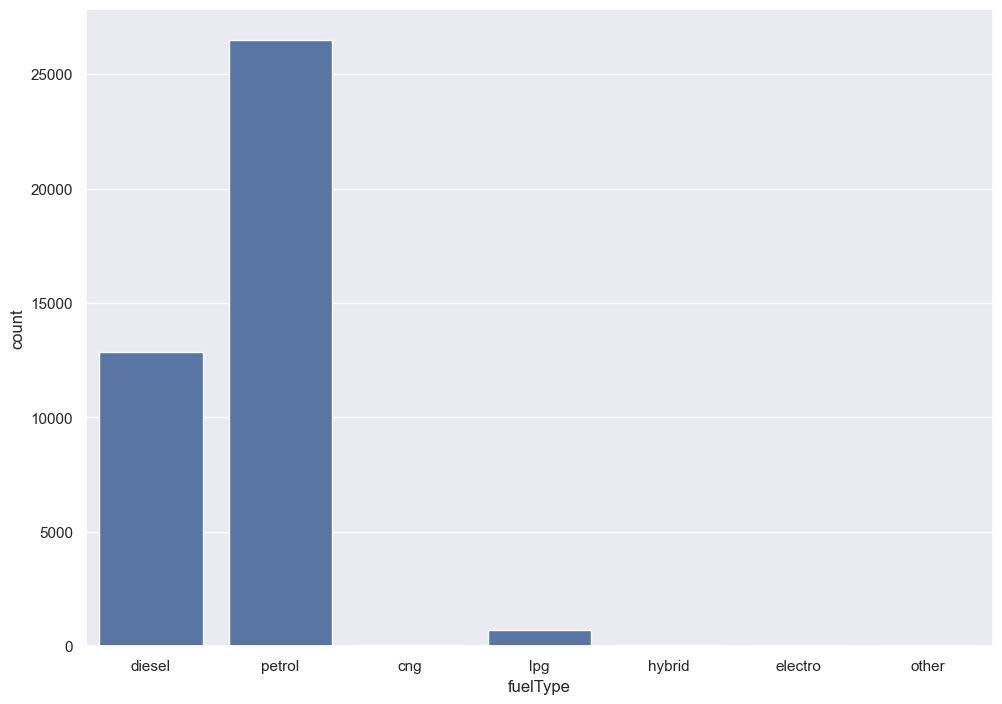

In [67]:
sns.countplot(x= 'fuelType',data=cars)

<Axes: xlabel='fuelType', ylabel='price'>

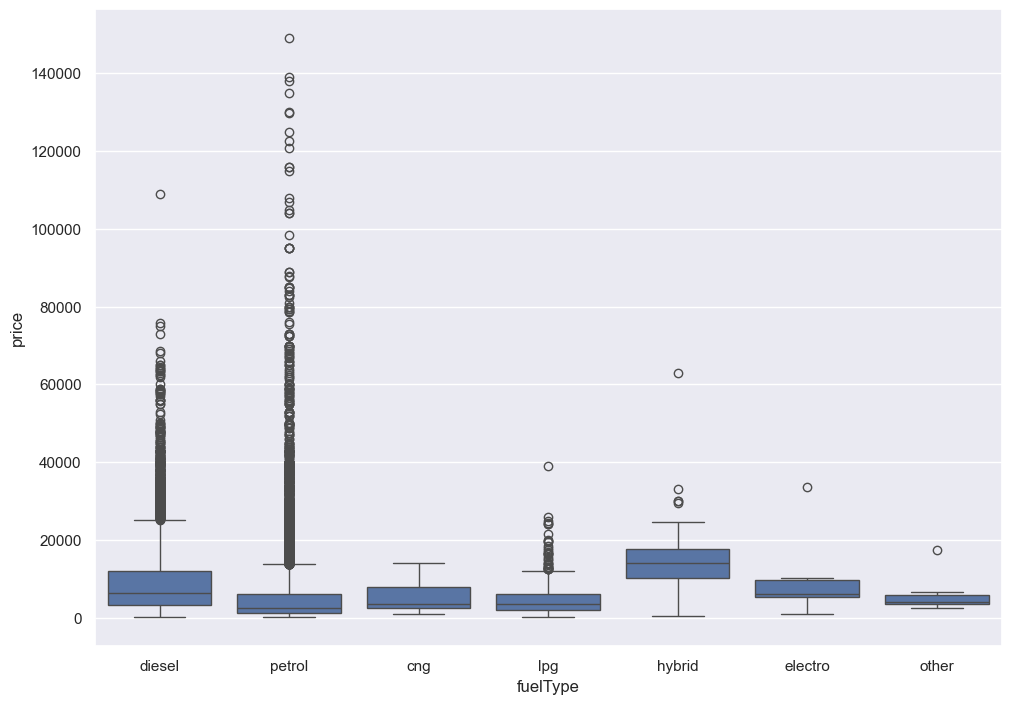

In [68]:
sns.boxplot(x= 'fuelType',y='price',data=cars)

<Axes: xlabel='brand', ylabel='count'>

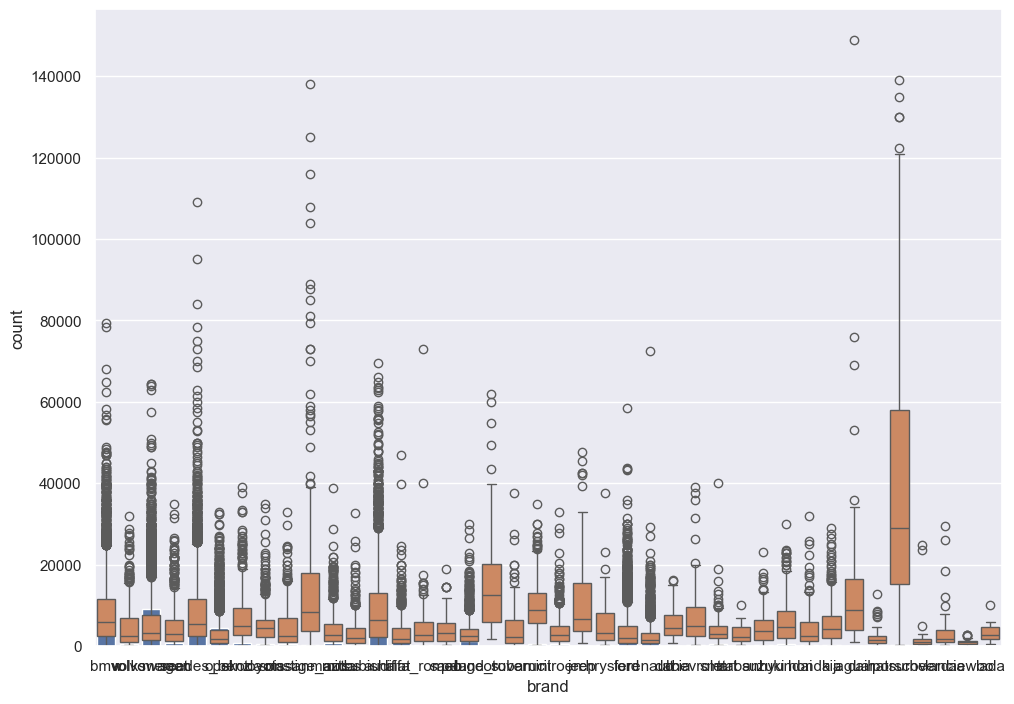

In [42]:
# Variable brand
cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.countplot(x= 'brand',data=cars)
sns.boxplot(x= 'brand',y='price',data=cars)
# Cars are distributed over many brands
# Considered for modelling 

<Axes: xlabel='notRepairedDamage', ylabel='count'>

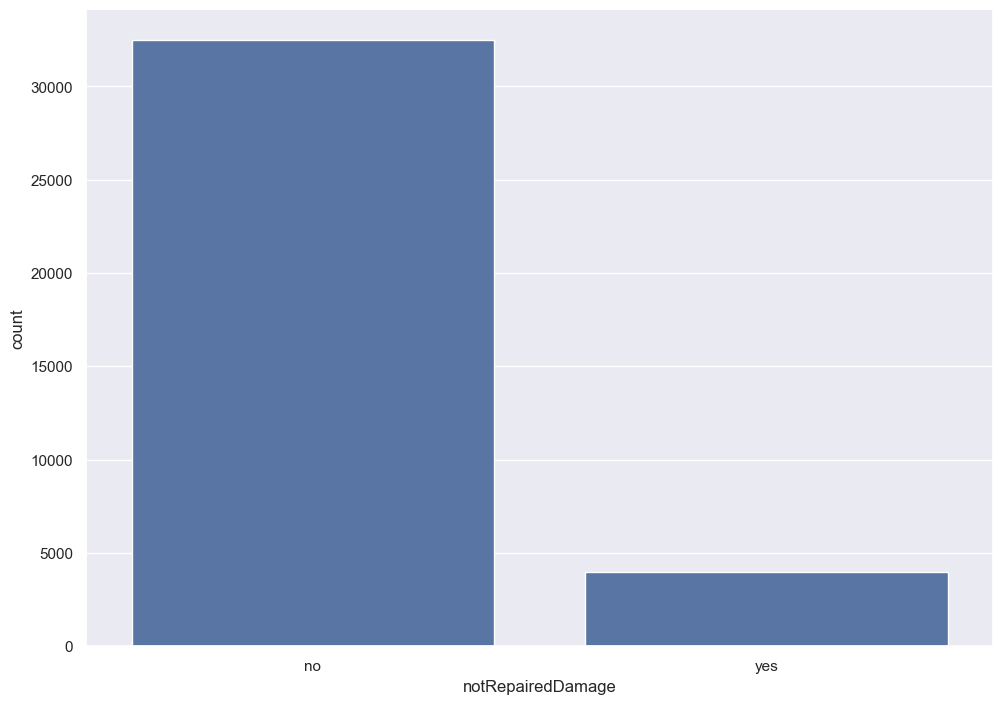

In [69]:
# Variable notRepairedDamage
# yes- car is damaged but not rectified
# no- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x= 'notRepairedDamage',data=cars)
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges

<Axes: xlabel='notRepairedDamage', ylabel='price'>

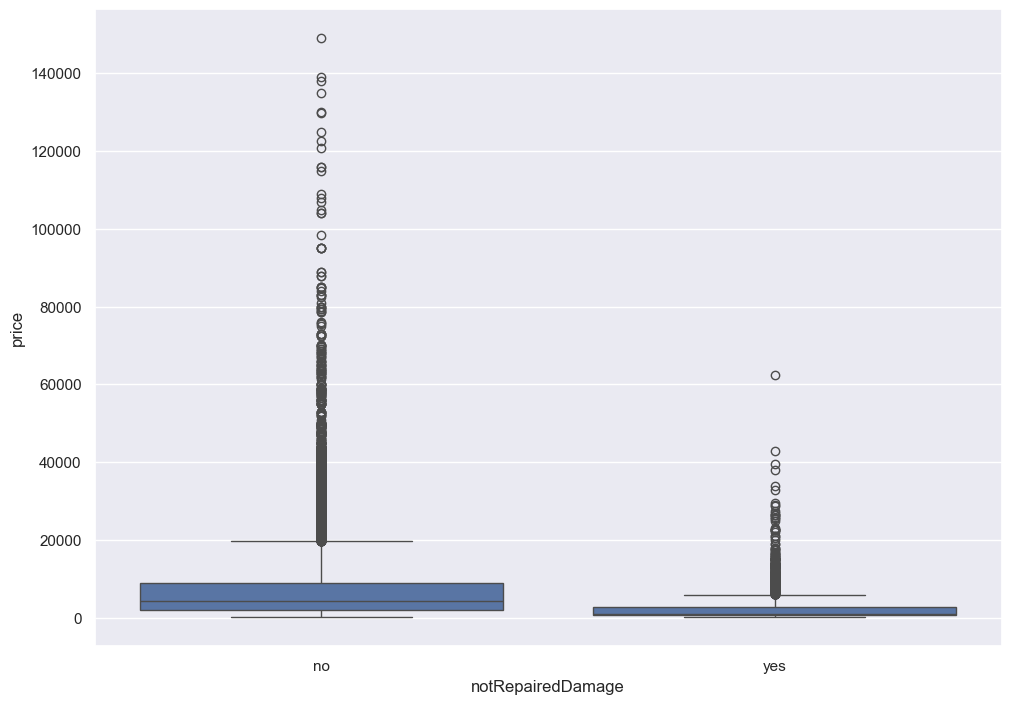

In [70]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)

# =============================================================================
# Removing insignificant variables
# =============================================================================

In [71]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

# =============================================================================
# Correlation
# =============================================================================

In [72]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:] 

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

# =============================================================================


"""
We are going to build a Linear Regression and Random Forest model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 
"""

# =============================================================================
# OMITTING MISSING VALUES
# =============================================================================

In [73]:
cars_omit=cars.dropna(axis=0)

In [74]:
# Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 

# =============================================================================
# IMPORTING NECESSARY LIBRARIES
# =============================================================================

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# =============================================================================
# MODEL BUILDING WITH OMITTED DATA
# =============================================================================

In [76]:
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

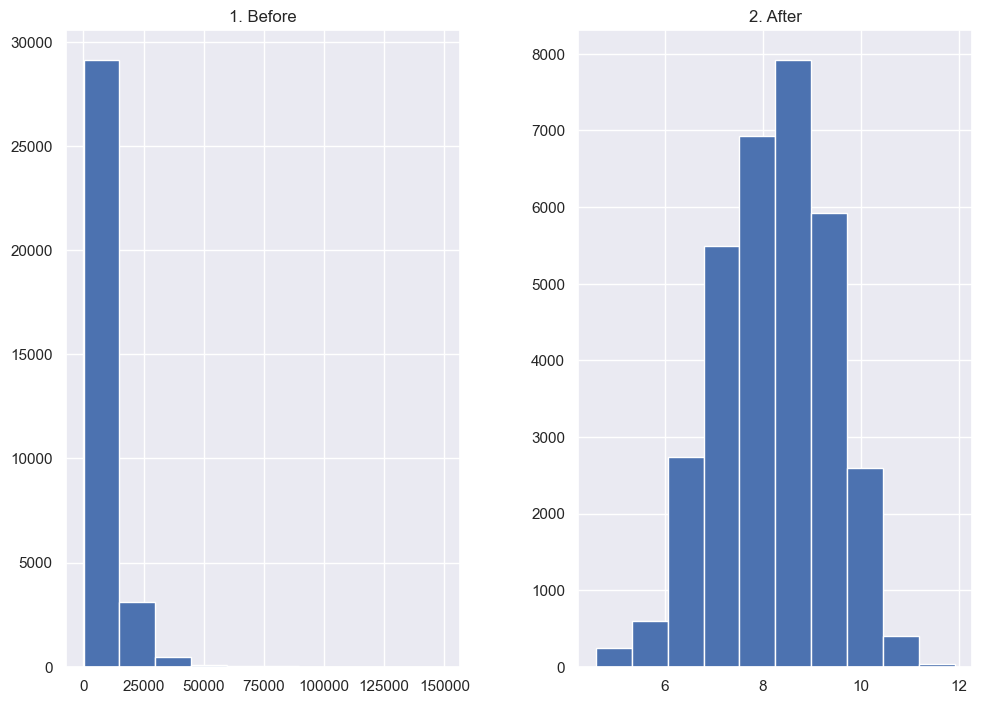

In [77]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

In [78]:
# Transforming price as a logarithmic value
y1 = np.log(y1)

In [79]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(23018, 300) (9866, 300) (23018,) (9866,)


# =============================================================================
# BASELINE MODEL FOR OMITTED DATA
# =============================================================================

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

In [80]:
# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653267


In [81]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [82]:
# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
                               
print(base_root_mean_square_error)

1.1274483657478247


# =============================================================================
# LINEAR REGRESSION WITH OMITTED DATA
# =============================================================================

In [83]:
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

In [84]:
# Model
model_lin1=lgr.fit(X_train,y_train)

In [85]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

In [86]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513854


In [87]:
# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649232 0.7800936978183916


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

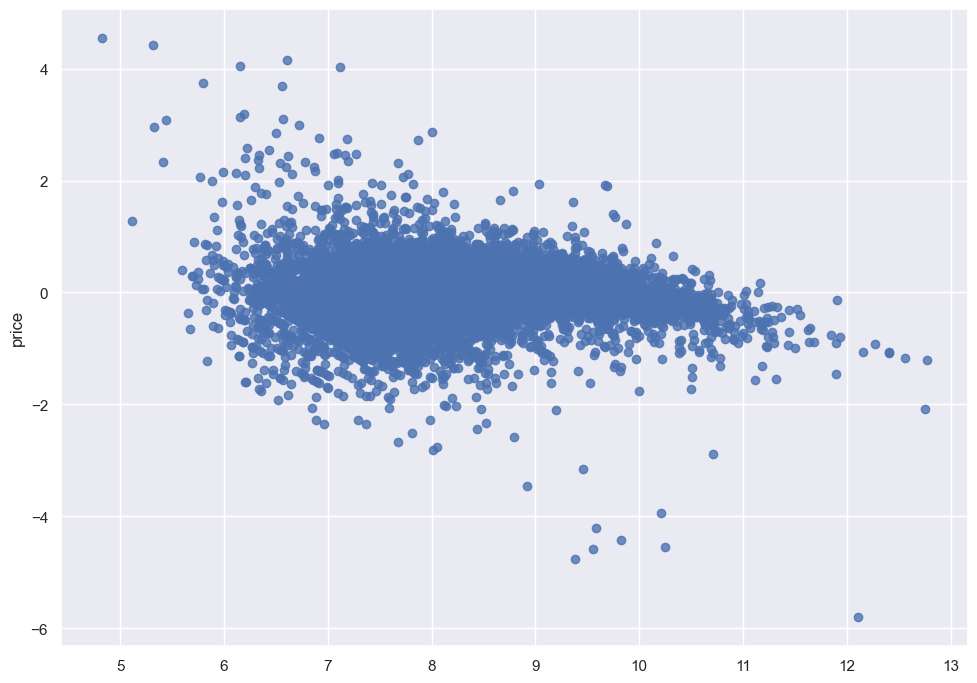

In [88]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)
residuals1.describe()

# =============================================================================
# RANDOM FOREST WITH OMITTED DATA
# =============================================================================

In [94]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='sqrt',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [95]:
# Model
model_rf1=rf.fit(X_train,y_train)

In [96]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [97]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4904583165147938


In [98]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   


0.8107608958978608 0.8323308826781988


# =============================================================================
# MODEL BUILDING WITH IMPUTED DATA
# =============================================================================

In [99]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [100]:
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 


# =============================================================================
# MODEL BUILDING WITH IMPUTED DATA
# =============================================================================

In [101]:
# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

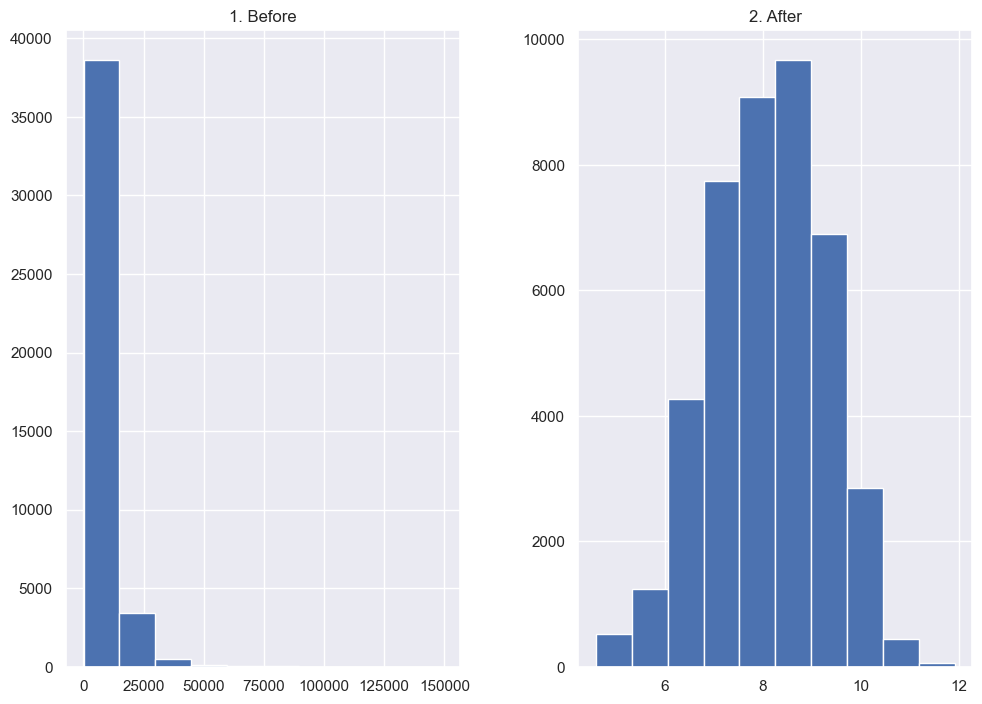

In [102]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [103]:
# Transforming price as a logarithmic value
y2 = np.log(y2)

In [104]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


# =============================================================================
# BASELINE MODEL FOR IMPUTED DATA
# =============================================================================

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

In [105]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519065


In [106]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

In [108]:
# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


# =============================================================================
# LINEAR REGRESSION WITH IMPUTED DATA
# =============================================================================

In [109]:
# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)


In [110]:
# Model
model_lin2=lgr2.fit(X_train1,y_train1)

In [111]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

In [112]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6483956449231297


In [113]:
# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)


0.7023339008631184 0.7071658736894362


# =============================================================================
# RANDOM FOREST WITH IMPUTED DATA
# =============================================================================

In [116]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='sqrt',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [117]:
# Model
model_rf2=rf2.fit(X_train1,y_train1)

In [118]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

In [119]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.5625193357650782


In [120]:
# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)                            

0.775960750923107 0.7998966387791918


In [122]:
##############################################################################

# Final output

print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)


# 

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183916
R squared value for test from Linear Regression=  0.7658615091649232
R squared value for train from Random Forest=  0.8323308826781988
R squared value for test from Random Forest=  0.8107608958978608
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5455481266513854
RMSE value for test from Random Forest=  0.4904583165147938



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894362
R squared value for test from Linear Regression=  0.7023339008631184
R squared value for train from Random Forest=  0.7998966387791918
R squared value for test from Random Forest=  0.775960750923107
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for tes

# =============================================================================
# END OF SCRIPT
# =============================================================================